In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Dimension : 1000*1000
radius = 500

#circle
x1 = radius*np.cos(np.linspace(0,1,1000)*(2*np.pi))
y1 = radius*np.sin(np.linspace(0,1,1000)*(2*np.pi))

#curl
x2 = radius/2*np.cos(np.linspace(0.25,-0.75,1000)*(2*np.pi))
y2 = radius/2*np.sign(np.cos(np.linspace(0.25,-0.75,1000)*(2*np.pi))) + radius/2*np.sin(np.linspace(0.25,-0.75,1000)*(2*np.pi))

#eye1
x3 = radius/8*np.cos(np.linspace(0,1,1000)*(2*np.pi))
y3 = radius/2 + radius/8*np.sin(np.linspace(0,1,1000)*(2*np.pi))

#eye2
x4 = radius/8*np.cos(np.linspace(0,1,1000)*(2*np.pi))
y4 = -radius/2 + radius/8*np.sin(np.linspace(0,1,1000)*(2*np.pi))

In [9]:
radius = 500
data_size = 2000

x = np.random.uniform(-radius, radius, data_size)
y = np.random.uniform(-radius, radius, data_size)

data = pd.DataFrame(zip(x,y), columns=["x","y"])

def labeler(row, radius):
    if row.x**2 + row.y**2>radius**2:
        return 0
    elif row.x**2 + (row.y-radius/2)**2<(radius/8)**2:
        return 1
    elif row.x**2 + (row.y+radius/2)**2<(radius/8)**2:
        return 2
    elif (row.x>0) & (row.x**2 + (row.y-radius/2)**2>(radius/2)**2):
        return 3
    elif (row.x<0) & (row.x**2 + (row.y+radius/2)**2<(radius/2)**2):
        return 3
    else:
        return 4

data['label'] = data.apply(labeler, axis=1, radius = radius)

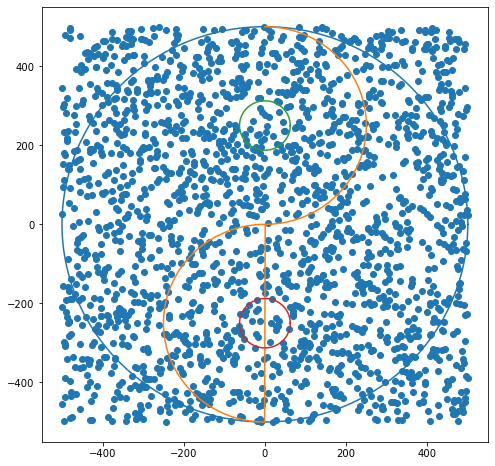

In [10]:
plt.figure(figsize=(8,8))
plt.plot(x1,y1, x2,y2, x3,y3, x4,y4)
plt.scatter(x,y)

In [11]:
import seaborn as sns

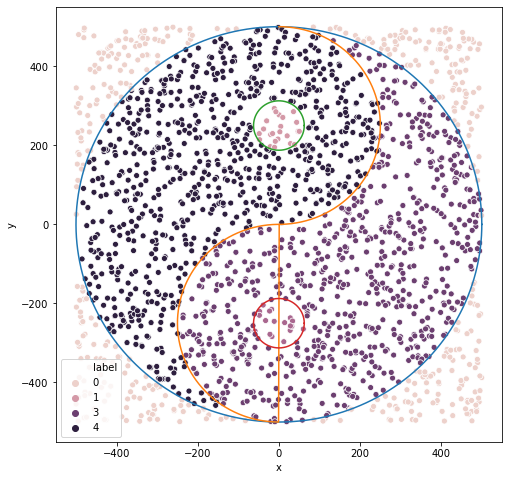

In [12]:
plt.figure(figsize = (8,8))
sns.scatterplot(x="x", y="y", hue="label", data=data)
plt.plot(x1,y1, x2,y2, x3,y3, x4,y4)

In [ ]:
#from sklearn.model_selection import t

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
LRE = LogisticRegression()

In [16]:
train_data = data[:1500]
test_data = data[1500:]

In [18]:
LRE = LRE.fit(train_data[["x", "y"]], train_data.label)

In [19]:
LRE.score(test_data[["x", "y"]], test_data.label)

0.694